# Reading Data

In [1]:
import pandas as pd

data = pd.read_csv ("online_shoppers_intention.csv")

data.shape
data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Preprocessing

In [2]:
data ['Weekend'] = data ['Weekend'].astype (int)
data ['Revenue'] = data ['Revenue'].astype (int)

In [3]:
# Checking Missing Value

print(data.isnull().mean()*100)

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64


In [4]:
# Checking Multicollinearity Among Features

correlation_matrix = data.corr(numeric_only=True)
high_correlation = correlation_matrix[correlation_matrix.abs() > 0.7]
print (high_correlation)

# the high correlation between ProductRelated and ProductRelated_Duration 
# the high correlation between ExitRates and BounceRates

                         Administrative  Administrative_Duration  \
Administrative                      1.0                      NaN   
Administrative_Duration             NaN                      1.0   
Informational                       NaN                      NaN   
Informational_Duration              NaN                      NaN   
ProductRelated                      NaN                      NaN   
ProductRelated_Duration             NaN                      NaN   
BounceRates                         NaN                      NaN   
ExitRates                           NaN                      NaN   
PageValues                          NaN                      NaN   
SpecialDay                          NaN                      NaN   
OperatingSystems                    NaN                      NaN   
Browser                             NaN                      NaN   
Region                              NaN                      NaN   
TrafficType                         NaN         

In [5]:
# Checking Multicollinearity between Features and Target

correlation = data.corr(numeric_only=True)
correlation['Revenue'].sort_values(ascending=False)

Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64

In [6]:
data = data.drop (['Weekend','Browser','TrafficType','Region','OperatingSystems','ExitRates', 'ProductRelated'], axis=1)



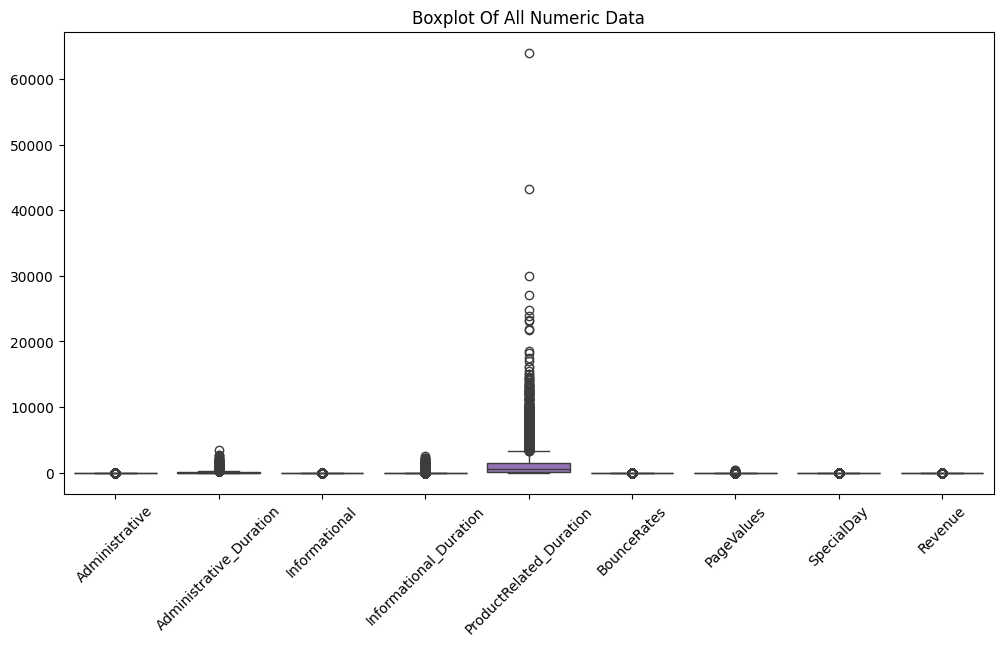

In [7]:
# Checking Outliers

import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes (include= 'number')
plt.figure (figsize= (12,6))
sns.boxplot (data= numeric_data)


plt.xticks (rotation = 45)
plt.title ("Boxplot Of All Numeric Data")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X = data.drop ('Revenue', axis=1)
y = data ['Revenue']

x_temp, x_test, y_temp, y_test = train_test_split (X, y, test_size=0.2, random_state=42, stratify=y)

x_train, X_val, y_train, y_val = train_test_split (x_temp, y_temp, test_size=0.2, random_state=42)

In [9]:
# Treating Outliers (Winsorizing)

from scipy.stats.mstats import winsorize

x_train['ProductRelated_Duration'] = winsorize (x_train['ProductRelated_Duration'], limits=[0.05,0.05])

In [10]:
# Checking Imbalanced data

print(data['Revenue'].value_counts(normalize=True))

Revenue
0    0.845255
1    0.154745
Name: proportion, dtype: float64


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline


numeric_cols = X.select_dtypes (include= 'number').columns.to_list()
categorical_cols = ['Month', 'VisitorType']


num_pipe = Pipeline ([
    ('scaling', MinMaxScaler())
])

cat_pipe = Pipeline ([
    ('encoding', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer ([
    ('num', num_pipe, numeric_cols),
    ('cat', cat_pipe, categorical_cols)
])


In [12]:
x_train_processed = preprocessor.fit_transform (x_train)

In [13]:
import joblib

joblib.dump(preprocessor, "preprocessor.pkl")

['preprocessor.pkl']

In [ ]:
# Treating Imbalanced data

from imblearn.over_sampling import SMOTE

sm = SMOTE (random_state=42)
x_train_res, y_train_res = sm.fit_resample (x_train_processed, y_train)


In [15]:
import tensorflow as tf
import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense

input_dim = x_train_res.shape[1]

model = Sequential([
    Dense (128, activation='relu', input_shape = (input_dim,), kernel_regularizer=regularizers.l2(0.01)),
    Dense (64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense (1, activation='sigmoid')
])




c:\Users\ASUS\Desktop\purchasing intention\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
from keras.optimizers import Adam
from keras import metrics

optimizer = Adam (learning_rate=0.001)
model.compile (
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy',
             metrics.Precision(name='precision'),
             metrics.Recall(name='recall'),
             metrics.AUC(name='auc')
    ]
)

In [17]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping (
    monitor= 'val_loss',
    patience= 10,
    restore_best_weights=True
)

In [18]:
from scipy.stats.mstats import winsorize

X_val ['ProductRelated_Duration'] = winsorize (X_val['ProductRelated_Duration'], limits=(0.05,0.05))

X_val_processed = preprocessor.transform (X_val)

In [19]:
model.fit(
    x_train_res, y_train_res,
    validation_data= (X_val_processed, y_val),
    epochs= 100,
    shuffle= True,
    callbacks= [early_stop],
    batch_size=32
)

Epoch 1/100
417/417 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6788 - auc: 0.7614 - loss: 0.8135 - precision: 0.6730 - recall: 0.6955 - val_accuracy: 0.7658 - val_auc: 0.7941 - val_loss: 0.5519 - val_precision: 0.3361 - val_recall: 0.5430
Epoch 2/100
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7586 - auc: 0.8430 - loss: 0.5841 - precision: 0.7572 - recall: 0.7614 - val_accuracy: 0.7532 - val_auc: 0.8459 - val_loss: 0.5983 - val_precision: 0.3579 - val_recall: 0.7715
Epoch 3/100
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7869 - auc: 0.8718 - loss: 0.5532 - precision: 0.7890 - recall: 0.7834 - val_accuracy: 0.7937 - val_auc: 0.8590 - val_loss: 0.5351 - val_precision: 0.4000 - val_recall: 0.6954
Epoch 4/100
417/417 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7980 - auc: 0.8814 - loss: 0.5354 - precision: 0.8008 - recall: 0.7935 - val_accuracy: 0.7912 - val_auc: 0.8656 - val_loss: 0.5551 - val_precision: 0.4021 - val_recall: 0.7483
Epoch 5/100
417/417 ━━━━━━━

In [20]:
x_test ['ProductRelated_Duration'] = winsorize (x_test ['ProductRelated_Duration'], limits=(0.05, 0.05))

x_test_processed = preprocessor.transform (x_test)

In [21]:
results = model.evaluate (
    x_test_processed, y_test,
    batch_size=32,
    verbose=1
)

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8808 - auc: 0.8895 - loss: 0.3881 - precision: 0.6140 - recall: 0.6204


In [22]:
y_pred_prob = model.predict (x_test_processed)
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype (int)

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [23]:
from sklearn.metrics import classification_report, roc_auc_score

print (classification_report(y_test, y_pred))
print ("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2084
           1       0.61      0.62      0.62       382

    accuracy                           0.88      2466
   macro avg       0.77      0.77      0.77      2466
weighted avg       0.88      0.88      0.88      2466

ROC-AUC: 0.8895254042266684


In [24]:
model.save ("my_model.h5")